<a href="https://colab.research.google.com/github/Material-Educativo/Inteligencia-artificial-aplicada/blob/main/Clustering/DBSCAN_en_NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCAN
En este notebook se aplicará DBSCAN para separar en dos clústeres los datos del archivo $NFL\_Filtrado.csv$.

Primero se importarán las bibliotecas necesarias.

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

Empleamos pandas para cargar la información del archivo csv y la guardamos en un dataframe.

Recuerda "activar la unidad de Drive" y cambiar la ruta para que el programa pueda encontrarlo en tu drive.

In [ ]:
# Enlace del archivo CSV en Google Drive
# Especifica la ruta en tu Google Drive donde quieres guardar el archivo CSV
ruta_csv = "/content/drive/MyDrive/Material Academico/Inteligencia artificial Diplomado/Notebooks/NFL_Filtrado.csv"

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(ruta_csv)

#Imprimir la información del dataframe
print(df.head())

   Height (inches)  Weight (lbs) Position
0               77           305       DE
1               72           210       DB
2               74           190       CB
3               74           208       CB
4               72           212       FS


Ahora extraemos las columnas de altura y peso para usarlas en el clustering.

También es importante normalizar los datos antes de aplicar cualquier técnica de clustering, ya que los algoritmos son sensibles a las escalas de las variables.

In [ ]:
# Extraer las columnas de altura y peso
X = df[['Height (inches)', 'Weight (lbs)']]

# Normalizar los datos
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X)
print(X_normalizado)

[[0.71428571 0.71359223]
 [0.35714286 0.25242718]
 [0.5        0.15533981]
 ...
 [0.42857143 0.22815534]
 [0.42857143 0.14563107]
 [0.85714286 0.62621359]]


Aplicamos agrupamiento jerárquico y agregamos una columna adicional en el dataframe, con el número de clúster al cual fue asignada cada muestra.

In [ ]:
# Definir el modelo DBSCAN
dbscan = DBSCAN(eps=0.111, min_samples=50)

# Ajustar el modelo a los datos
dbscan.fit(X_normalizado)

# Obtener las etiquetas de los clusters
df['DBSCAN_Cluster'] = dbscan.labels_
df.head(-5)

,Height (inches),Weight (lbs),Position,DBSCAN_Cluster
0,77,305,DE,0
1,72,210,DB,1
2,74,190,CB,1
3,74,208,CB,1
4,72,212,FS,1
...,...,...,...,...
876,75,280,DE,0
877,80,295,DE,-1
878,75,311,DT,0
879,75,305,NT,0


<ipython-input-9-9d1c0db3a386>:10: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(cluster_minus1['Height (inches)'], cluster_minus1['Weight (lbs)'],


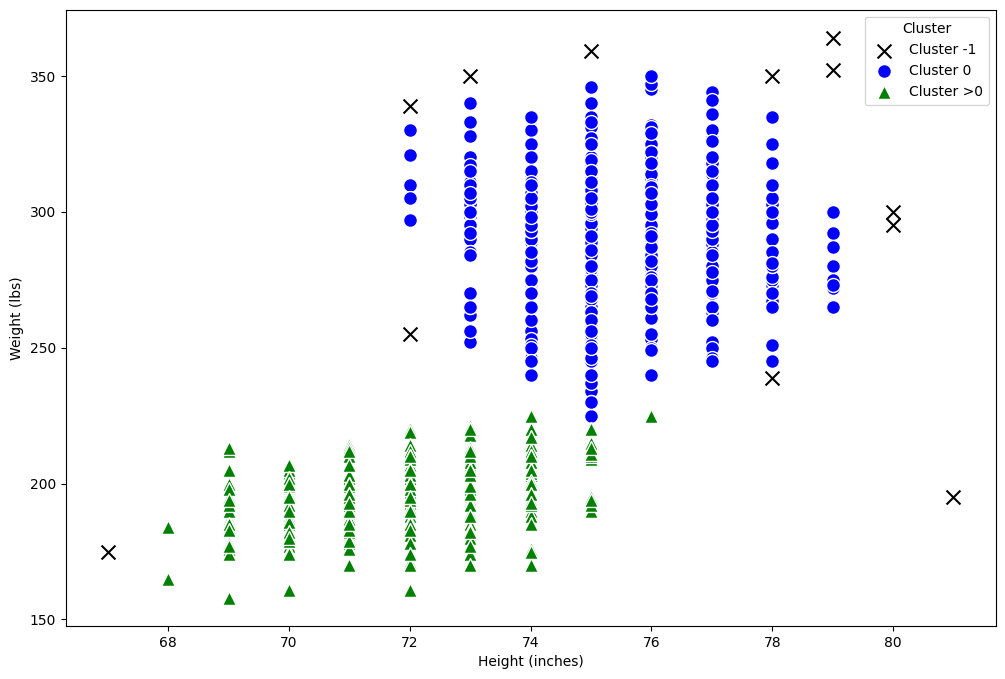

In [ ]:
# Crear una figura y un eje
plt.figure(figsize=(12, 8))

# Filtrar los datos por cluster
cluster_minus1 = df[df['DBSCAN_Cluster'] == -1]
cluster_0 = df[df['DBSCAN_Cluster'] == 0]
cluster_other = df[df['DBSCAN_Cluster'] == 1]

# Graficar los datos
plt.scatter(cluster_minus1['Height (inches)'], cluster_minus1['Weight (lbs)'],
            color='black', marker='x', label='Cluster -1', s=100, edgecolor='w')
plt.scatter(cluster_0['Height (inches)'], cluster_0['Weight (lbs)'],
            color='blue', marker='o', label='Cluster 0', s=100, edgecolor='w')
plt.scatter(cluster_other['Height (inches)'], cluster_other['Weight (lbs)'],
            color='green', marker='^', label='Cluster >0', s=100, edgecolor='w')

# Configurar el título y las etiquetas
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.legend(title='Cluster', loc='upper right')

# Mostrar el gráfico
plt.show()


In [ ]:
import numpy as np

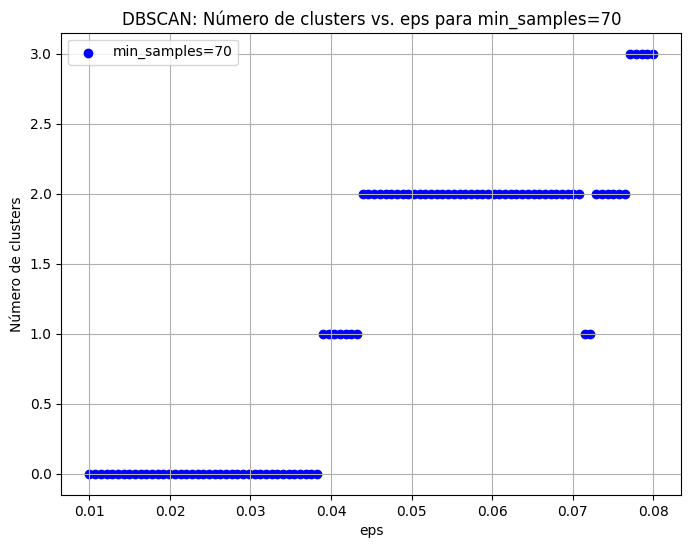

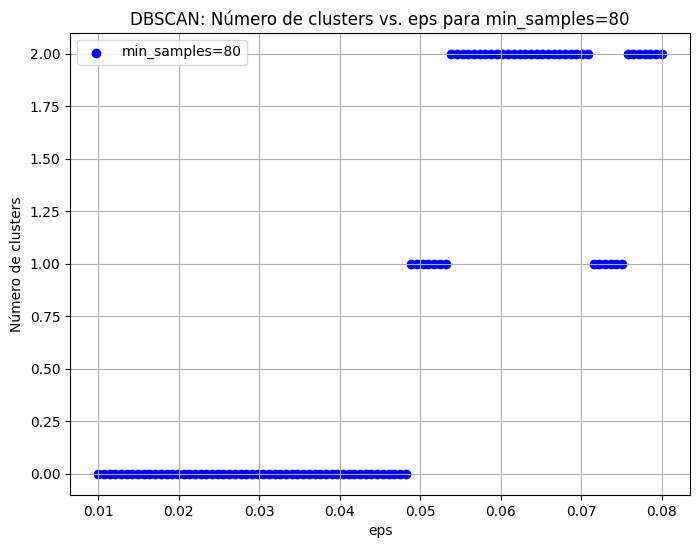

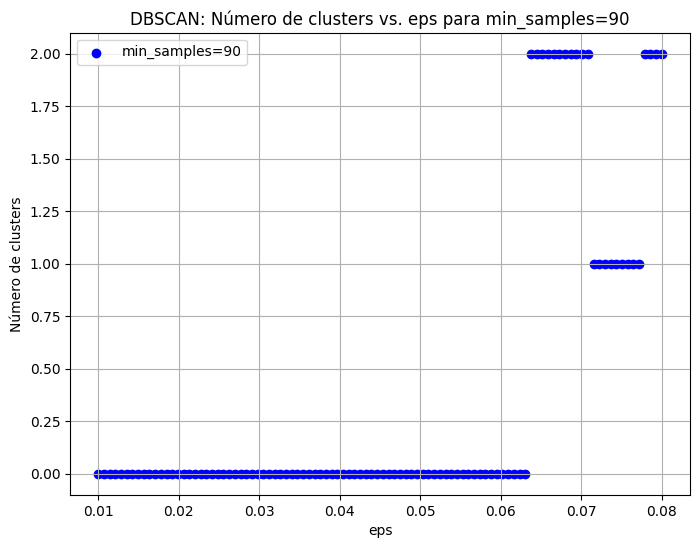

In [ ]:
# Definir los valores para min_samples y eps
min_samples_values = [70, 80, 90]
eps_values = np.linspace(0.01, 0.08, 100)

# Crear un diagrama de dispersión para cada valor de min_samples
for min_samples in min_samples_values:
    num_clusters = []
    for eps in eps_values:
        # Definir el modelo DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo a los datos
        labels = dbscan.fit_predict(X_normalizado)

        # Contar el número de clusters (excluyendo el ruido (-1))
        num_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))

    # Graficar los resultados
    plt.figure(figsize=(8, 6))
    plt.scatter(eps_values, num_clusters, c='blue', label=f'min_samples={min_samples}')
    plt.xlabel('eps')
    plt.ylabel('Número de clusters')
    plt.title(f'DBSCAN: Número de clusters vs. eps para min_samples={min_samples}')
    plt.legend()
    plt.grid(True)
    plt.show()